# MNIST Dataset Notebook

The purpose of this notebook is to explain how to read the MNIST dataset efficiently into memory in Python.

## What is the MNIST Dataset

Then MNIST dataset is a database of handwriten images of digits. It contains 60,000 train images and 10,000 test images. All digits have been size-normalized and centered in a fixed-size image. This dataset is widely used by people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. More information on the MNIST dataset can be found [here.](http://yann.lecun.com/exdb/mnist/)

#### File Format
The MNIST dataset contain four conpressed files

- train-images-idx3-ubyte.gz (Train Images)
- train-labels-idx1-ubyte.gz (Train Lables)
- t10k-images-idx3-ubyte.gz (Test Images)
- t10k-labels-idx1-ubyte.gz (Test Lables)

The integars within these files are stored in MSB format (Big endian) meaning that users of Intel processers need to change the format to Little endian to be able to use the files. For more information on Little and Big Endian please click [here.](https://chortle.ccsu.edu/AssemblyTutorial/Chapter-15/ass15_3.html) This is a very simple format and doesn't require much work to extract the data as we will show below, but first lets look at IDX file format.

#### IDX file format
The IDX file format is a simple format for vectors and multidimensional matrices of various numerical types.
The file format looks like this 

- magic number
- size in dimension 1
- size in dimension 2
- size in dimension 3
- ....
- size in dimension N
- data

The magic number is four bytes long. The first 2 bytes are always 0.
The third byte codes the type of the data:

- 0x08: unsigned byte
- 0x09: signed byte
- 0x0B: short (2 bytes)
- 0x0C: int (4 bytes)
- 0x0D: float (4 bytes)
- 0x0E: double (8 bytes)

The fouth byte codes the number of dimensions of the vector/matrix: 1 for vectors, 2 for matrices....
The sizes in each dimension are 4-byte integers (big endian, like in most non-Intel processors).
The data is stored like in a C array, i.e. the index in the last dimension changes the fastest.

The above on IDX file format was extracted from : http://www.fon.hum.uva.nl/praat/manual/IDX_file_format.html

## Reading Bytes from a File

We are going to start off by importing our libraries. We are going to need [gzip, ](https://www.gzip.org/)[matplotlib](https://matplotlib.org/) and [numpy](http://www.numpy.org/) 

In [42]:
# Imports
import gzip
import matplotlib.pyplot as plt
import numpy as np

### Reading Test Labels

Once we have imported the libraries we are going to attempt to read the labels from the t10k test file. To do with we will be using gzip which we imported above. 

In [45]:
# Reading the t10K lables 
with gzip.open('data/t10k-labels-idx1-ubyte.gz','rb') as f: #use gzip to open the file in read binary mode
        file_content = f.read(4) # magic number is the first 4 bytes
        
        # Read first 4 bytes of file
        print("Data is of type :",type(file_content[0:4]))
        
        magic = int.from_bytes(file_content,'big') # Convert bytes to integers.
        print("Magic is:", magic) # print to console

        # the same as above but with labels
        nolab = f.read(4)
        nolab = int.from_bytes(nolab,'big')
        print("Num of labels is:", nolab)

        # for looping through labels
        train_labels = [f.read(1) for i in range(nolab)]
        train_labels = [int.from_bytes(train_labels, 'big') for train_labels in train_labels]
        

Data is of type : <class 'bytes'>
Magic is: 2049
Num of labels is: 10000


From the above outputs we can see that the data is unsigned bytes, the magic number is 2049 and that there is 10000 lables which is correct. 
We can look at one of the labeles by running the following line of code

### Display Test Label

In [46]:
print("Label 1000 is: " ,train_labels[1000])

Label 1000 is:  9


### Reading Test Images

We are not going to extract the t10k images. The steps used to extract the images are simular to the above steps. The only difference is that we are going to need to run the integers through a set of loops.

In [47]:
# Reading the t10K Images 
with gzip.open('data/t10k-images-idx3-ubyte.gz', 'rb') as f: # use gzip to open the file in read binary mode
    magic = f.read(4) # magic number is the first 4 bytes
    magic = int.from_bytes(magic, 'big') # Convert bytes to integers.
    print("Magic is:", magic) # print to console

    # Number of images in next 4 bytes
    noimg = f.read(4)
    noimg = int.from_bytes(noimg, 'big')
    print("Number of images is:", noimg)

    # Number of rows in next 4 bytes
    norow = f.read(4)
    norow = int.from_bytes(norow, 'big')
    print("Number of rows is:", norow)

    # Number of columns in next 4 bytes
    nocol = f.read(4)
    nocol = int.from_bytes(nocol, 'big')
    print("Number of cols is:", nocol)

    train_images = []  # create array
    # for loop
    for i in range(noimg):
        rows = []
        for r in range(norow):
            cols = []
            for c in range(nocol):
                # append the current byte for every column
                cols.append(int.from_bytes(f.read(1), 'little'))
            rows.append(cols)  # append columns array for every row
        train_images.append(rows)  # append rows for every image

Magic is: 2051
Number of images is: 10000
Number of rows is: 28
Number of cols is: 28


### Display Test Image

Now that all the test images are loaded into memory we can display one of the images Like above we will show that 1000th image. Hope fully we should see a number 9.

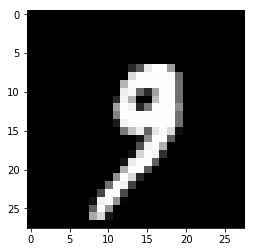

In [48]:
%matplotlib inline
plt.imshow(train_images[1000],cmap='gray')